In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [69]:
#using pandas library and 'read_csv' function to read BlackFriday csv file as file already formated for us from Kaggle
data=pd.read_csv("./AB_NYC_2019.csv")
#examing head of BlackFriday csv file 
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
print(data.columns.tolist())

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [4]:
data.dtypes.value_counts()

int64      7
object     6
float64    3
dtype: int64

We have 6 variables which might be categorical

In [5]:
data.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [9]:
(data.isna().sum() *100) / data.shape[0]

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

Observations: "name" and "host_name" are irrelevant and insignificant to our data analysis as they will not add any predictive value to the model.
Columns "last_review" and "review_per_month" have a few null values and will need simple handling.
"last_review" is date; if there were no reviews for the listing - date will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [70]:
data.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
data.fillna({'reviews_per_month':0}, inplace=True)

In [71]:
#replacing all NaN values in 'reviews_per_month' with 0
data.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
data.reviews_per_month.isnull().sum()

0

In [13]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
len(data.neighbourhood.unique())

221

In [16]:
len(data.host_id.unique())

37457

In [17]:
data.host_id.value_counts().head(15)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

Since I was unable to visualise the entire Host_ID distribution, I have taken a subset of the top hosts and checked their distribution

In [18]:
top_hosts = data.host_id.value_counts().head(15)

In [21]:
top_host_df=pd.DataFrame(top_hosts)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Count'}, inplace=True)
top_host_df['Host_ID'] = top_host_df['Host_ID'].astype('category') 
top_host_df

,Host_ID,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [40]:
data.calculated_host_listings_count.max()

327

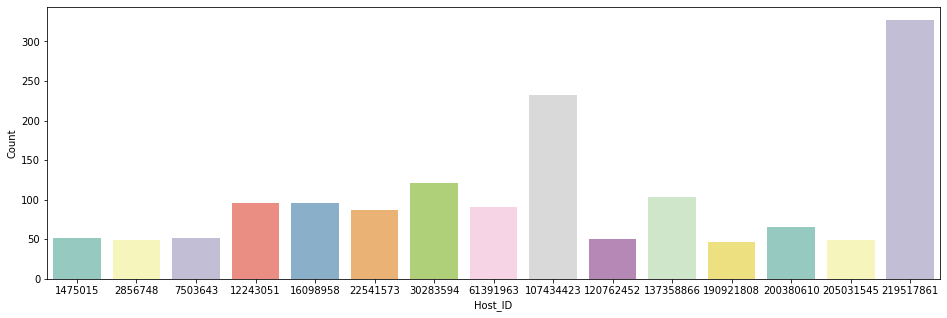

In [22]:
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x="Host_ID", y='Count', data=top_host_df, palette="Set3")
# viz_1.set_title('Hosts with the most listings in NYC')
# viz_1.set_ylabel('Count of listings')
# viz_1.set_xlabel('Host IDs')
# viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Calculating the percentile of hostings

In [35]:

host_df=pd.DataFrame(data.host_id.value_counts())
host_df.reset_index(inplace=True)
host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
host_df['Host_ID'] = top_host_df['Host_ID'].astype('category') 
host_df.head()

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96


In [24]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=data.loc[data['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=data.loc[data['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=data.loc[data['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=data.loc[data['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=data.loc[data['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [25]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


np.percentile(host_df['P_Count'], q=[0, 25, 50, 75,80, 85, 90, 95, 99,  100])

In [39]:
neighbourhood_df=pd.DataFrame(data.neighbourhood_group.value_counts())
neighbourhood_df.reset_index(inplace=True)
neighbourhood_df.rename(columns={'index':'neighbourhood_group', 'neighbourhood_group':'P_Count'}, inplace=True)
# neighbourhood_df['neighbourhood_group'] = top_host_df['neighbourhood_group'].astype('category') 
neighbourhood_df.head()

,neighbourhood_group,P_Count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [27]:
data.neighbourhood.value_counts().head(15)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

In [31]:
top_nb_df=pd.DataFrame(data.neighbourhood.value_counts().head(15))
top_nb_df.reset_index(inplace=True)
top_nb_df.rename(columns={'index':'neighbourhoods', 'neighbourhood':'Count'}, inplace=True)
# top_nb_df['neighbourhood'] = top_host_df['neighbourhood'].astype('category') 
top_nb_df

,neighbourhoods,Count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


In [32]:
top_nb = data.loc[data['neighbourhood'].isin(top_nb_df['neighbourhoods'])]

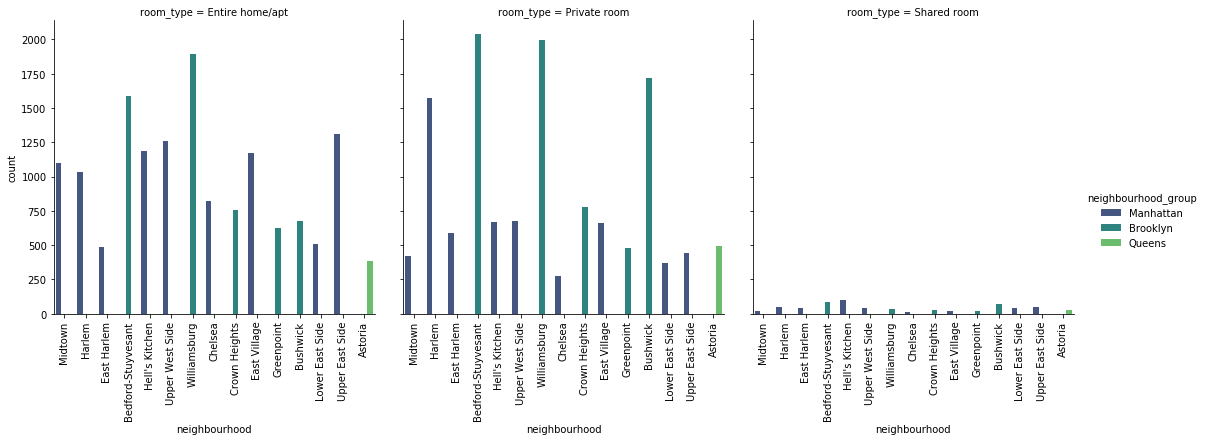

In [36]:
fig=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=top_nb, kind='count',palette="viridis")
fig.set_xticklabels(rotation=90)

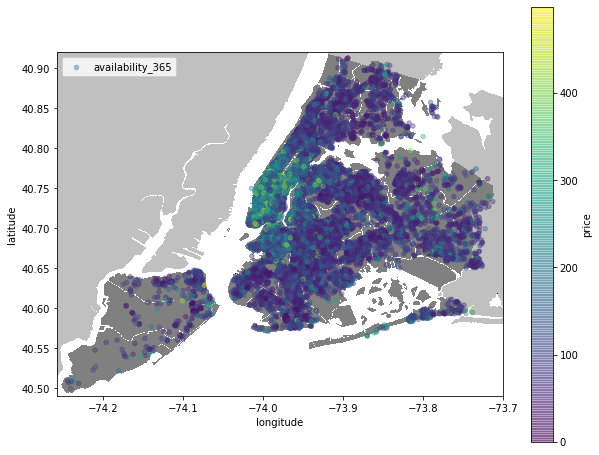

In [39]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
data[data['price']<500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('viridis'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

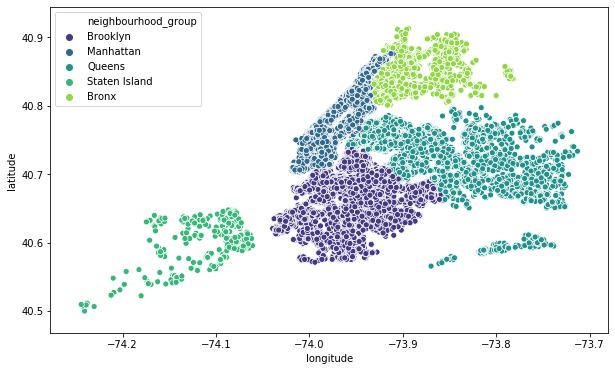

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group,palette="viridis")
plt.ioff()

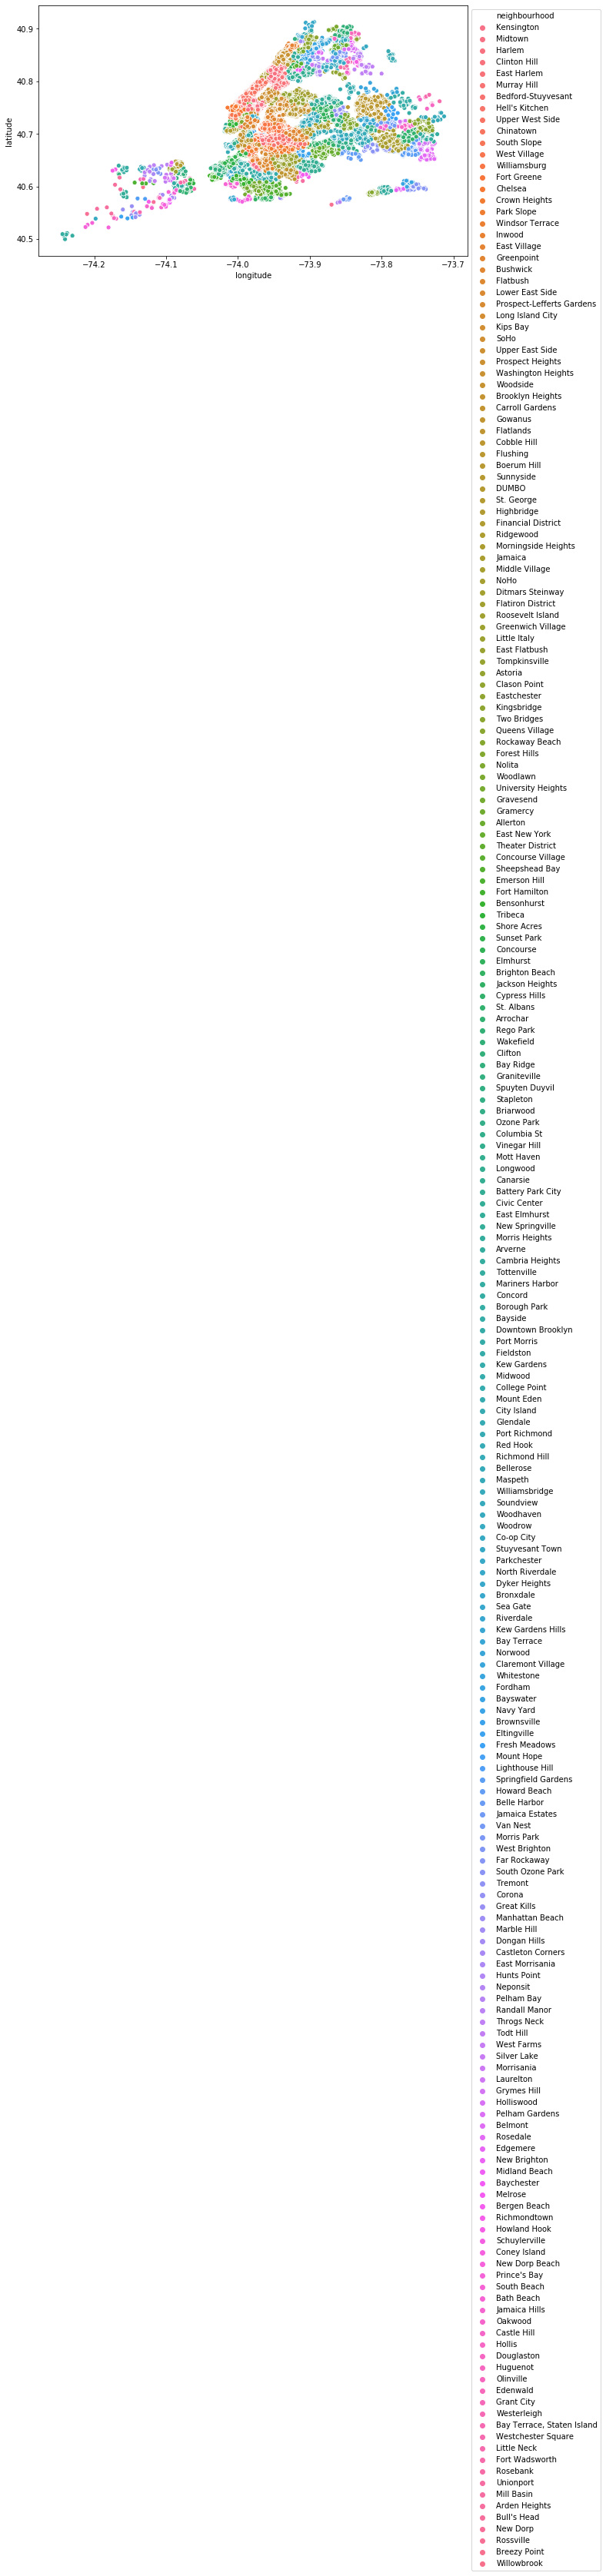

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.ioff()

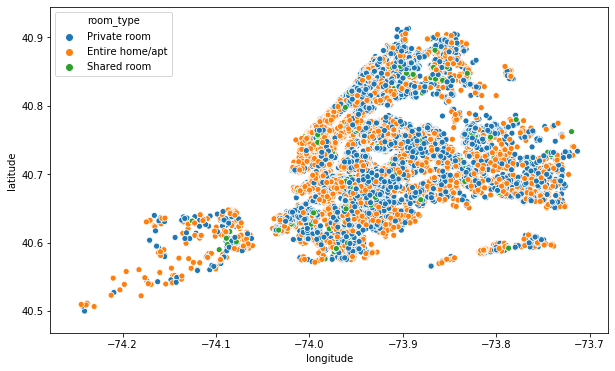

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type)
plt.ioff()

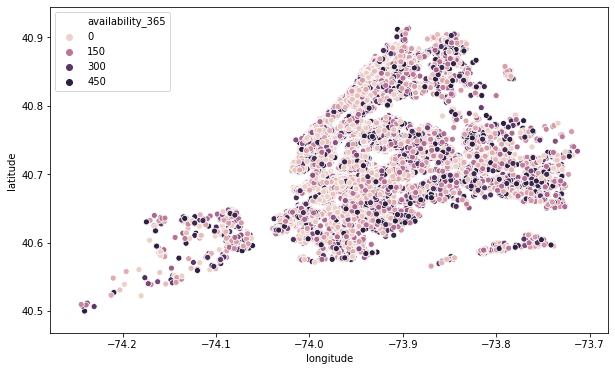

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.availability_365)
plt.ioff()

In [61]:
x= data.nlargest(15,'reviews_per_month')
print(x.price.mean())
print(x.room_type.value_counts())

72.46666666666667
Private room       14
Entire home/apt     1
Name: room_type, dtype: int64


In [63]:
y=data.nlargest(15,'number_of_reviews')
print(y.price.mean())
print(y.room_type.value_counts())

66.6
Private room       13
Entire home/apt     2
Name: room_type, dtype: int64


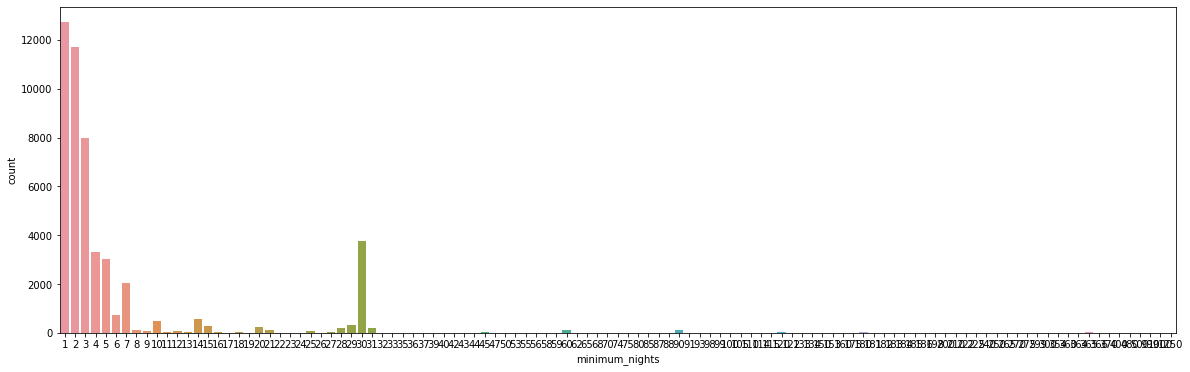

In [66]:
plt.figure(figsize=(20,6))
sns.countplot(data['minimum_nights'])

In [60]:
data['minimum_nights'].value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

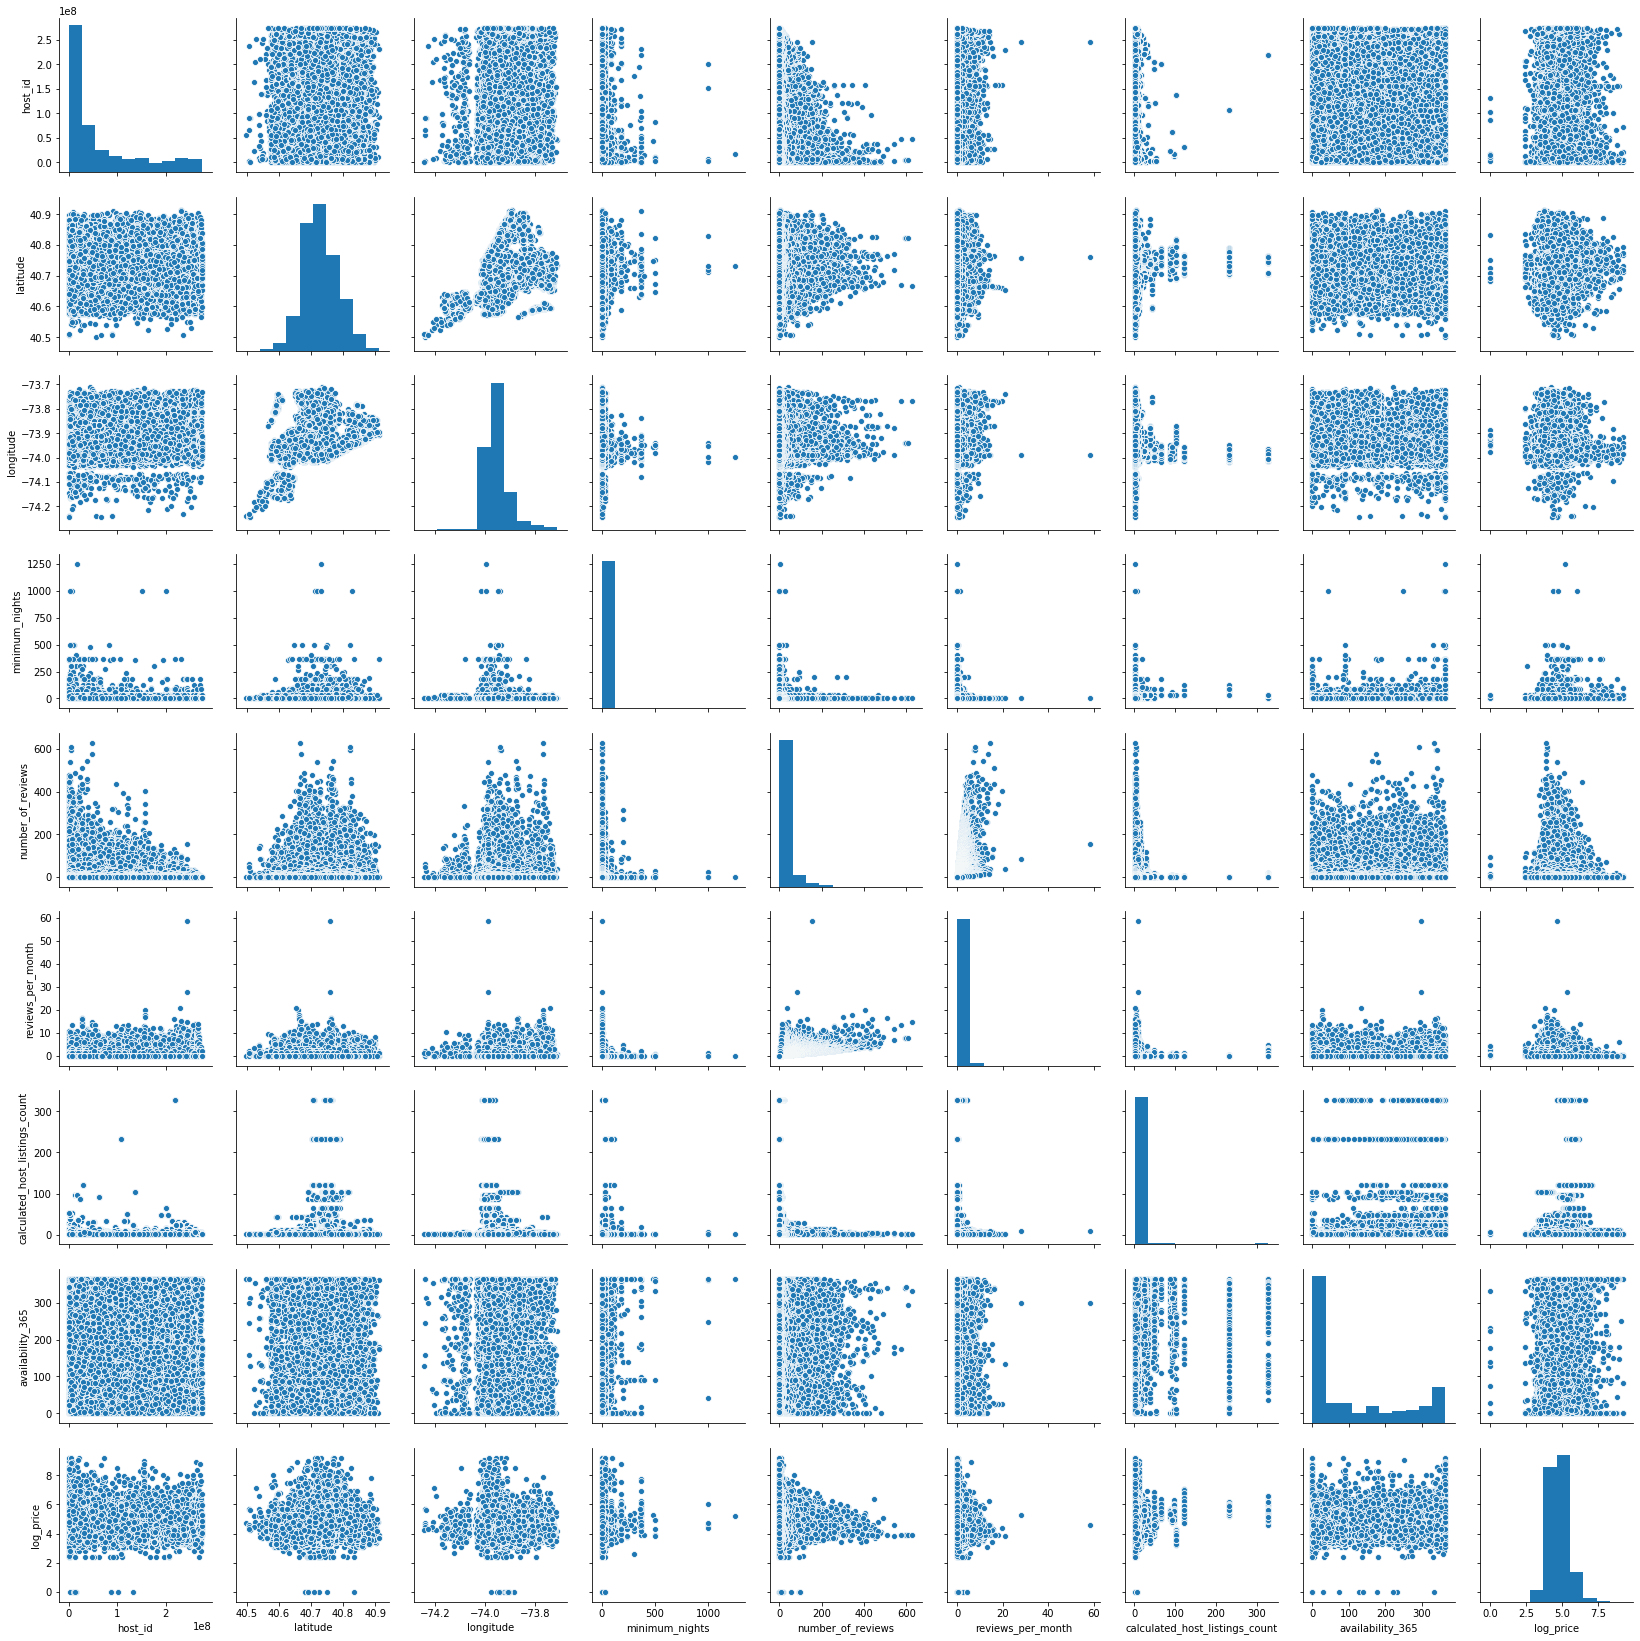

In [136]:
sns.pairplot(data)

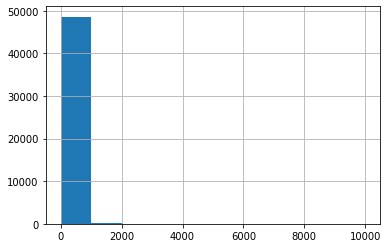

In [73]:
data.price.hist()

In [83]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import norm

In [76]:
normaltest(data.price.values)

NormaltestResult(statistic=105082.85525693388, pvalue=0.0)

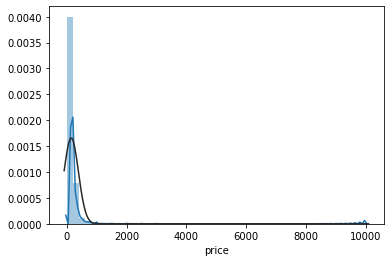

In [89]:
plt.figure(figsize=(6,4))
sns.distplot(data['price'], fit=norm)

In [81]:
log_price = np.log(data.price +1)

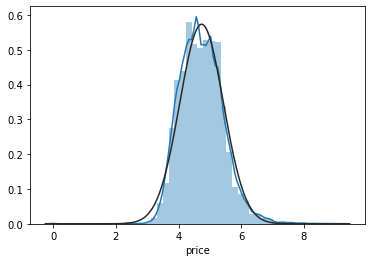

In [90]:
log_price = np.log(data.price +1)
plt.figure(figsize=(6,4))
sns.distplot(log_price, fit=norm)

In [91]:
data['log_price'] = np.log(data.price +1)
data.drop(['price'], axis=1, inplace=True)

# One Hot Encoding

In [92]:
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [122]:
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

In [103]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Copy of the data
data_ohc = data.copy()
# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()
# ohc = OneHotEncoder(drop='first')

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)
    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [105]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

226

In [107]:
X = data_ohc.copy().drop('log_price', axis = 1)
y = data_ohc['log_price'].copy()

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [128]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_r2 = r2_score(y_test, linearRegression.predict(X_test))
print(linearRegression_rmse, linearRegression_r2)

0.464060659716015 0.5443505154692683


In [139]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
s= StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [140]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_train_pf = pf.fit_transform(X_train_s)
X_test_pf = pf.fit_transform(X_test_s)

In [141]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train_pf, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test_pf))
linearRegression_r2 = r2_score(y_test, linearRegression.predict(X_test_pf))
print(linearRegression_rmse, linearRegression_r2)

MemoryError: Unable to allocate 7.25 GiB for an array with shape (34226, 28440) and data type float64

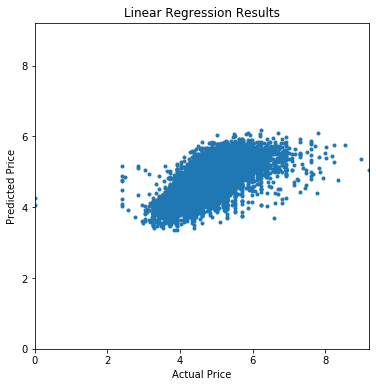

In [112]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [ ]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train_pf, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test_pf))
ridgeCV_r2 = r2_score(y_test, ridgeCV.predict(X_test_pf))

print(ridgeCV.alpha_, ridgeCV_rmse)

In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train_pf, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test_pf))
lassoCV_r2 = r2_score(y_test, lassoCV.predict(X_test_pf))

print(lassoCV.alpha_, lassoCV_rmse, lassoCV_r2)  # Lasso is slower

In [119]:
order = np.argsort(np.abs(lassoCV.coef_))[::-1]
for i in order:
    coef_ = lassoCV.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(lassoCV.coef_[i]))

neighbourhood_167, 0.8429997791311227
room_type_0, 0.7068099627987792
neighbourhood_21, 0.5246662106259866
neighbourhood_197, 0.5088562406196573
neighbourhood_36, 0.4809818874696594
neighbourhood_group_2, 0.38637631957129437
neighbourhood_25, 0.34269291600674645
neighbourhood_98, 0.34144945763652573
neighbourhood_204, 0.34124557444652187
neighbourhood_14, 0.3155998730973963
neighbourhood_53, 0.30968844557581643
neighbourhood_43, 0.3056248834358229
neighbourhood_214, 0.2895671431457706
neighbourhood_158, 0.28415295573164684
neighbourhood_75, 0.28397366567153604
neighbourhood_127, 0.27910526717742284
neighbourhood_65, 0.27635138019816546
neighbourhood_3, 0.2637260936767954
neighbourhood_71, 0.2626700200151422
neighbourhood_151, 0.2614010522797339
neighbourhood_191, 0.24330062381729095
neighbourhood_57, 0.24123451693156706
neighbourhood_41, 0.22965791492704735
neighbourhood_85, 0.22696470117685735
neighbourhood_91, 0.21556824789394072
neighbourhood_80, 0.21236200274355516
neighbourhood_19

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train_pf, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test_pf))
elasticNetCV_r2 = r2_score(y_test, elasticNetCV.predict(X_test_pf))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse, elasticNetCV_r2)

In [ ]:
order = np.argsort(np.abs(elasticNetCV.coef_))[::-1]
for i in order:
    coef_ = elasticNetCV.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(elasticNetCV.coef_[i]))

In [ ]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
r2_vals = [linearRegression_r2, ridgeCV_r2, lassoCV_r2, elasticNetCV_r2]
labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df['r2'] = r2_vals
rmse_df

In [ ]:
print(np.sum(ridgeCV.coef_ != 0))
print(np.sum(lassoCV.coef_ != 0))
print(np.sum(elasticNetCV.coef_ != 0))

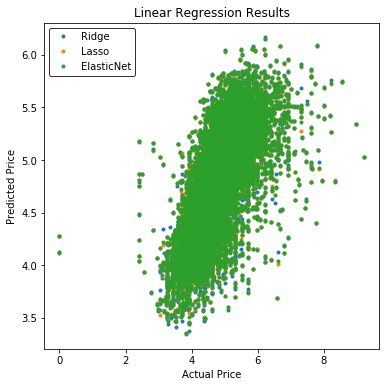

In [118]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

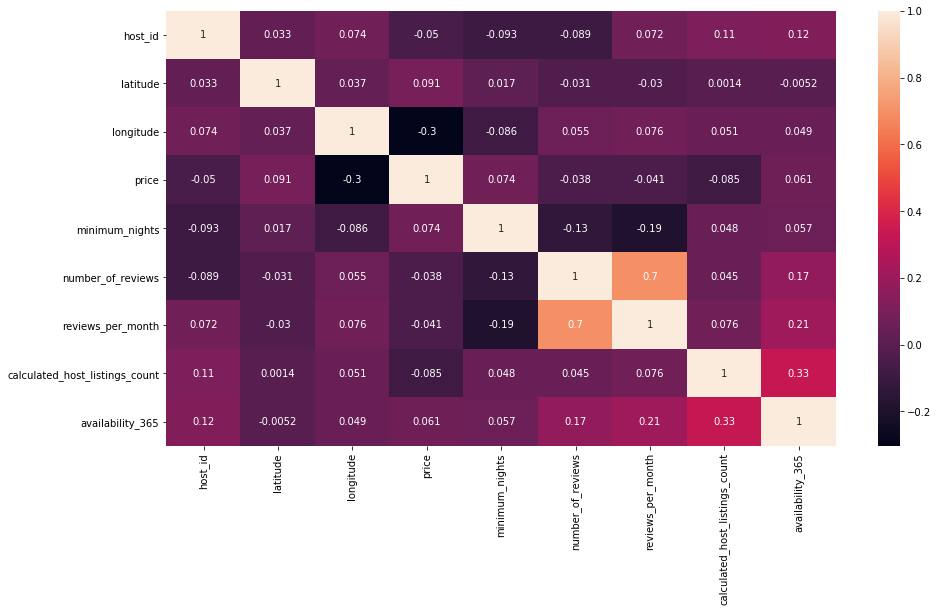

In [47]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

In [72]:
data.columns.tolist()

['host_id',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

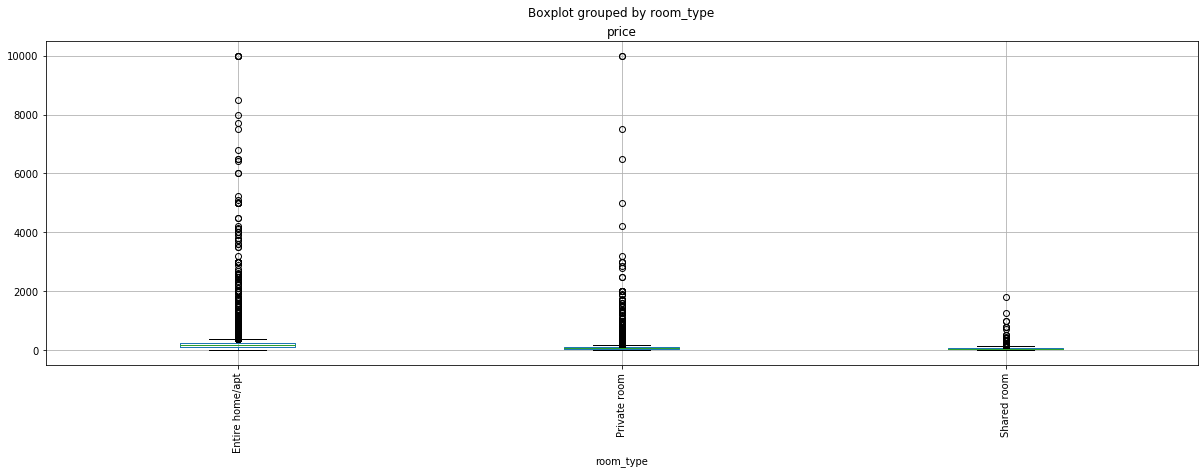

In [40]:
data.boxplot(column='price', by='room_type', figsize=(20,6), rot=90)

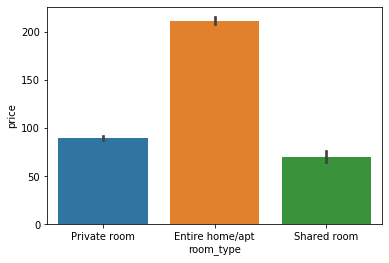

In [44]:
sns.barplot(x='room_type',y='price', data=data)

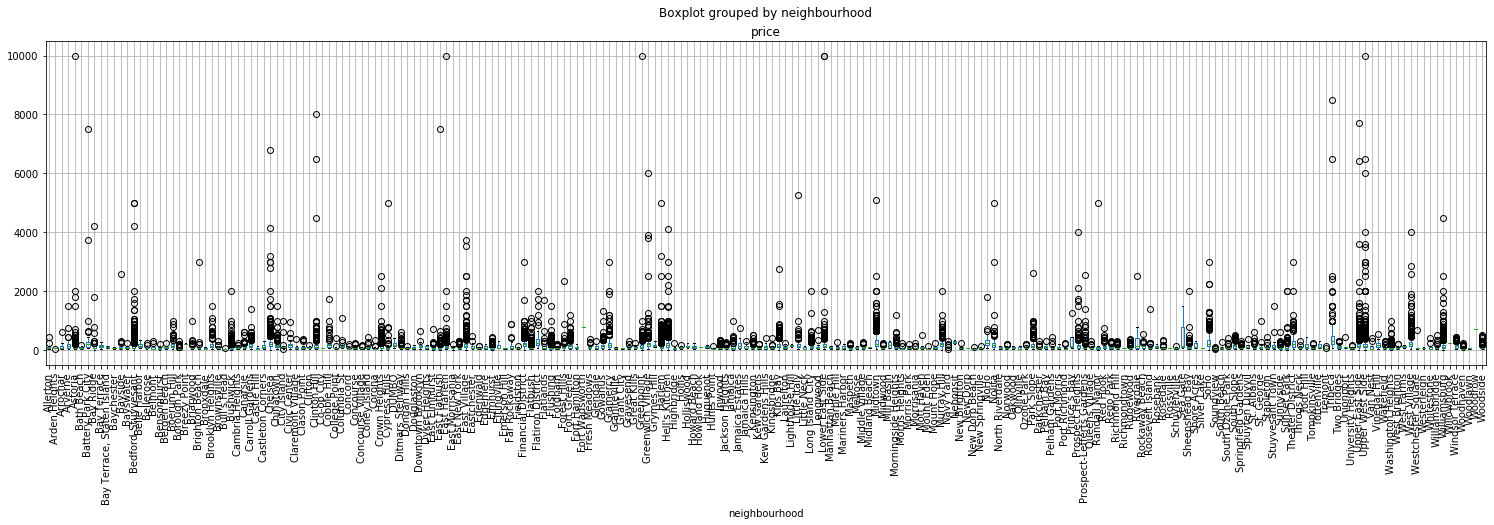

In [46]:
data.boxplot(column='price', by='neighbourhood', figsize=(25,6), rot=90)